In [1]:
# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 


In [2]:
# Solves the Least Squares problem for given X, Y. 
# alpha is the regularization coefficient
# Output is the estimated y for both X and X_all 
def solve_ols(X, Y, X_all, alpha):
    W = np.dot(np.linalg.pinv(np.dot(X.T, X) + alpha*np.identity(np.shape(X)[1])), np.dot(X.T, Y))
    return np.dot(X, W), np.dot(X_all, W)

In [3]:
def run_ols(X, Y, Z, X_all, Y_all, Z_all, alpha, Title):
    Y_LS, Y_LS_all = solve_ols(Z, Y, Z_all, alpha)
    
    fig, ax = plt.subplots(figsize=(12,12), dpi=50)
    
    #training data
    #ax.plot(X, Y, 'rx')
    #ax.plot(X, Y_LS, 'bo')

    #test data
    ax.plot(X_all, Y_all, 'rx')
    ax.plot(X_all, Y_LS_all, 'bo')
    
    ax.set(xlabel='X', ylabel='Y', title=Title)
    ax.grid()
    plt.show()
    print (np.linalg.norm(Y_LS-Y))

In [4]:
# generate n data points based on a combination of sinosuidal and polynomial functions
def generate_data(n):
    X = np.random.rand(n, 1)*5
    X = np.sort(X, axis=0)
    Y = 1 + (X-0.1)*(X-0.1)*(X-0.1) - 5*(X-0.5)*(X-0.5) + X + 5* np.sin(5*X)
    Y = Y + 0.1*np.random.randn(n,1)
    return X, Y

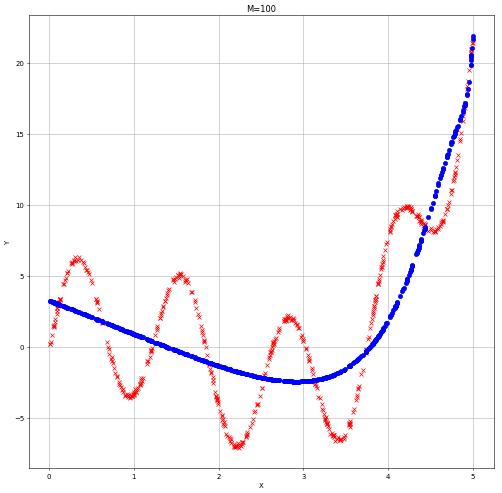

21.607309746376394


In [5]:
n_train = 50
n_test = 500
M = 100
alpha = 1

X_train, Y_train = generate_data(n_train)
X_test, Y_test = generate_data(n_test)


#run_ols(X_train, Y_train, X_train, X_test, Y_test, X_test, alpha, 'M=0')

X_current = np.concatenate((X_train, np.ones((n_train, 1))), axis=1)
X_current_test = np.concatenate((X_test, np.ones((n_test, 1))), axis=1)

#run_ols(X_train, Y_train, X_current, X_test, Y_test, X_current_test, alpha, 'M=1')

X_added = X_train
X_added_test = X_test
for i in range(M-1):
    X_added = X_added*X_train*0.2 #multiplying by 0.2 to avoid getting huge numbers and hence large numerical error
    X_added_test = X_added_test*X_test*0.2 #multiplying by 0.2 to avoid getting huge numbers and hence large numerical error
    X_current = np.concatenate((X_current, X_added), axis=1)
    X_current_test = np.concatenate((X_current_test, X_added_test), axis=1)
    #run_ols(X_train, Y_train, X_current, X_test, Y_test, X_current_test, alpha, 'M=' + str(i+2))

run_ols(X_train, Y_train, X_current, X_test, Y_test, X_current_test, alpha, 'M=' + str(i+2))
